In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
from sklearn.preprocessing import StandardScaler
import re
# sc = StandardScaler()
# a = re.compile('\d+')
# date = []
# for i in data['Edition']:
#     b = re.findall('[0-9]{4}',i)
#     date.append(b)


paper = [i.split(',')[0] for i in data['Edition']]
datee = [i.split(' ')[-1] for i in data['Edition']]
date = [i.strip() for i in datee]
date = [2018 if i in ['Import','set','Print','NTSC','Facsimile','Edition','Unabridged','Audiobook'] else int(i) for i in date]
Ratings = [float(i.split(' ')[0]) for i in data['Reviews']]
Reviews = [i.split(' ')[0] for i in data['Ratings']]
Reviews =[int(i.replace(',','')) if len(i)>3 else int(i) for i in Reviews]

x = pd.DataFrame()
x['Author'] = data['Author']
x['paper'] = paper
x['Date'] = date
x['Ratings'] = Ratings
x['Reviews'] = Reviews
x['Genre'] = data['Genre']
x['BookCategory'] = data['BookCategory']
x['Date'] = [2019-i for i in x['Date']]
y = data['Price']
x.head()

# paper=pd.get_dummies(x['paper'],drop_first=True)
# paper = pd.DataFrame(paper)
# x = pd.concat([x,paper],1)
# x = x.drop(['paper','Genre'],1)
# category = pd.get_dummies(x['BookCategory'],drop_first=True)
# x = pd.concat([x,category],1)
# x = x.drop('BookCategory',1)


,Author,paper,Date,Ratings,Reviews,Genre,BookCategory
0,Chris Kuzneski,Paperback,3,4.0,8,Action & Adventure (Books),Action & Adventure
1,Arun Khopkar,Paperback,7,3.9,14,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Thomas Hobbes,Paperback,37,4.8,6,International Relations,Humour
3,Agatha Christie,Paperback,2,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,Editors of Life,Hardcover,13,5.0,1,Photography Textbooks,"Arts, Film & Photography"


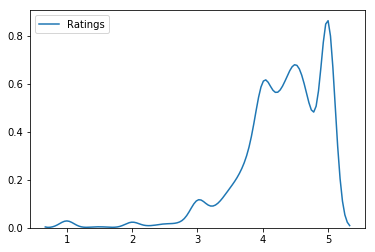

In [8]:
import seaborn as sb
sb.kdeplot(x['Ratings'])

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [22]:
cat_feat_ind=np.where(x.dtypes !=np.float)

In [23]:
cat_feat_ind

(array([0, 1, 2, 4, 5, 6], dtype=int64),)

In [5]:
from catboost import CatBoostRegressor
# from sklearn.model_selection import GridSearchCV
# # cb=CatBoostRegressor(iterations=1100,learning_rate=0.09,depth=6,eval_metric='RMSE')

# parameters = {'learning_rate':[0.01,0.03,0.04],'depth':[6,8,9],'iterations':[750,850,950,1000,1100]}
# grid = GridSearchCV(estimator=cb,param_grid=parameters,cv=2)
# grid.fit(xtrain,ytrain,cat_features=np.array([0,4,5]),plot=True)

In [6]:
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error
cb = CatBoostRegressor(depth=10, iterations =1500, learning_rate= 0.01,leaf_estimation_iterations=5)
cb.fit(xtrain,ytrain,cat_features=np.array([0,1,5,6]))
ypred = cb.predict(xtest)

0:	learn: 729.5959785	total: 657ms	remaining: 16m 25s
1:	learn: 728.5767069	total: 795ms	remaining: 9m 55s
2:	learn: 727.0022274	total: 1.13s	remaining: 9m 25s
3:	learn: 726.0611674	total: 1.18s	remaining: 7m 22s
4:	learn: 724.3069867	total: 1.49s	remaining: 7m 24s
5:	learn: 723.1053993	total: 1.78s	remaining: 7m 23s
6:	learn: 721.6376051	total: 2.07s	remaining: 7m 22s
7:	learn: 720.7197095	total: 2.12s	remaining: 6m 36s
8:	learn: 719.5907117	total: 2.25s	remaining: 6m 12s
9:	learn: 718.6565912	total: 2.3s	remaining: 5m 43s
10:	learn: 717.6717136	total: 2.61s	remaining: 5m 53s
11:	learn: 716.5198931	total: 2.9s	remaining: 5m 59s
12:	learn: 715.2598533	total: 3.21s	remaining: 6m 7s
13:	learn: 714.2722821	total: 3.55s	remaining: 6m 17s
14:	learn: 713.1066433	total: 3.86s	remaining: 6m 22s
15:	learn: 712.0198483	total: 4.23s	remaining: 6m 32s
16:	learn: 710.5309797	total: 4.54s	remaining: 6m 35s
17:	learn: 709.8217771	total: 4.57s	remaining: 6m 16s
18:	learn: 708.6654814	total: 4.83s	rema

KeyboardInterrupt: 

In [35]:
# np.sqrt(mean_squared_log_error(ytest,ypred))
ypred

array([171.50139012, 276.82491671, 208.02764555, ..., 389.09605238,
       274.85910461, 882.72949943])

In [10]:
data1 = pd.read_excel('Data_Test.xlsx')
data1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [30]:
paper = [i.split(',')[0] for i in data1['Edition']]
datee = [i.split(' ')[-1] for i in data1['Edition']]
date = [i.strip() for i in datee]
date = [2018 if i in ['Import','set','Print','NTSC','Facsimile','Edition','Unabridged','Audiobook','Illustrated'] else int(i) for i in date]
Ratings1 = [float(i.split(' ')[0]) for i in data1['Reviews']]
Reviews1 = [i.split(' ')[0] for i in data1['Ratings']]
Reviews1 =[int(i.replace(',','')) if len(i)>3 else int(i) for i in Reviews1]

y = pd.DataFrame()
y['Author'] = data1['Author']
y['paper'] = paper
y['Date'] = date
y['Ratings'] = Ratings1
y['Reviews'] = Reviews1
y['Genre'] = data1['Genre']
y['BookCategory'] = data1['BookCategory']
y['Date'] = [2019-i for i in y['Date']]
# y=pd.get_dummies(y,drop_first=True)
y.shape
y_pred = cb.predict(y)

In [34]:
y_pred = [int(round(i))for i in y_pred]

In [32]:
new = pd.DataFrame()
new['Price'] = y_pred

In [16]:
# new.to_excel('PPfinal.xlsx',index=False)